<a href="https://colab.research.google.com/github/agusputrawan/Clustering_Classification_Project/blob/main/%5BKlasifikasi%5D_Submission_Akhir_BMLP_Putu_Agus_Putrawan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report,  precision_score, recall_score
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/agusputrawan/Clustering_Classification_Project/refs/heads/main/Dataset/credit_card_clustering.csv')
df.head()

,SALDO,FREKUENSI_SALDO,TOTAL_PEMBELIAN,PEMBELIAN_TUNGGAL,PEMBELIAN_CICILAN,PENARIKAN_TUNAI,FREKUENSI_PEMBELIAN,FREKUENSI_PEMBELIAN_TUNGGAL,FREKUENSI_PEMBELIAN_CICILAN,FREKUENSI_PENARIKAN_TUNAI,TRANSAKSI_PENARIKAN_TUNAI,TRANSAKSI_PEMBELIAN,BATAS_KREDIT,PEMBAYARAN,PEMBAYARAN_MINIMUM,PERSEN_PEMBAYARAN_LUNAS,MASA_LAYANAN,cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12,1
4,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12,1


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [4]:
X = df.drop(columns=['cluster'])
y = df['cluster']  # Kolom cluster sebagai target

# Membagi data menjadi training set dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Jumlah data latih:", len(X_train))
print("Jumlah data uji:", len(X_test))


Jumlah data latih: 6908
Jumlah data uji: 1728


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [5]:
# Membuat dan melatih model Random Forest, Logistic Regression, Decision Tree, dan KNN
models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

# Evaluasi semua model
results = {}

for model_name, model in models.items():
    print(f"Evaluating {model_name}...")

    # Latih model
    model.fit(X_train, y_train)

    # Prediksi data uji
    y_pred = model.predict(X_test)

    # Hitung metrik evaluasi
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    results[model_name] = {"Accuracy": accuracy, "F1-Score": f1}

    # Tampilkan classification report
    print(f"Classification Report for {model_name}:\n")
    print(classification_report(y_test, y_pred))

# Menampilkan hasil evaluasi
print("\nSummary of Model Evaluation:")
for model_name, metrics in results.items():
    print(f"{model_name}: Accuracy = {metrics['Accuracy']:.2f}, F1-Score = {metrics['F1-Score']:.2f}")


Evaluating Logistic Regression...


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           0       0.92      0.93      0.93       440
           1       0.99      0.99      0.99      1262
           2       0.36      0.38      0.37        26

    accuracy                           0.96      1728
   macro avg       0.76      0.77      0.76      1728
weighted avg       0.96      0.96      0.96      1728

Evaluating Decision Tree...
Classification Report for Decision Tree:

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       440
           1       0.98      0.99      0.99      1262
           2       1.00      0.96      0.98        26

    accuracy                           0.98      1728
   macro avg       0.98      0.97      0.98      1728
weighted avg       0.98      0.98      0.98      1728

Evaluating Random Forest...
Classification Report for Random Forest:

              precision    recall  f1-score   supp

Tulis narasi atau penjelasan algoritma yang Anda gunakan.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

Evaluating Random Forest...
Random Forest Metrics:
Accuracy: 0.99
F1-Score: 0.99

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       440
           1       0.99      0.99      0.99      1262
           2       1.00      0.85      0.92        26

    accuracy                           0.99      1728
   macro avg       0.99      0.94      0.96      1728
weighted avg       0.99      0.99      0.99      1728



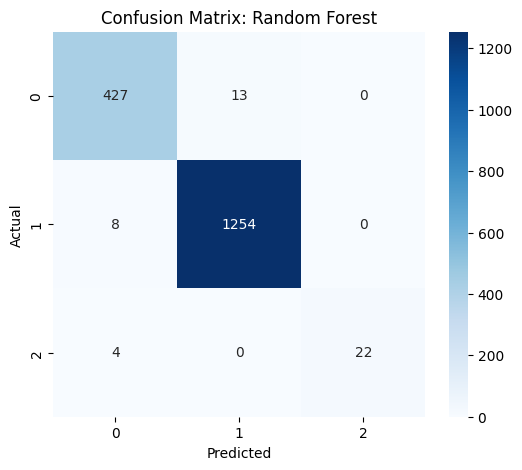

Evaluating K-Nearest Neighbors (KNN)...
KNN Metrics:
Accuracy: 0.99
F1-Score: 0.99

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       440
           1       0.99      0.99      0.99      1262
           2       1.00      0.85      0.92        26

    accuracy                           0.99      1728
   macro avg       0.99      0.94      0.96      1728
weighted avg       0.99      0.99      0.99      1728



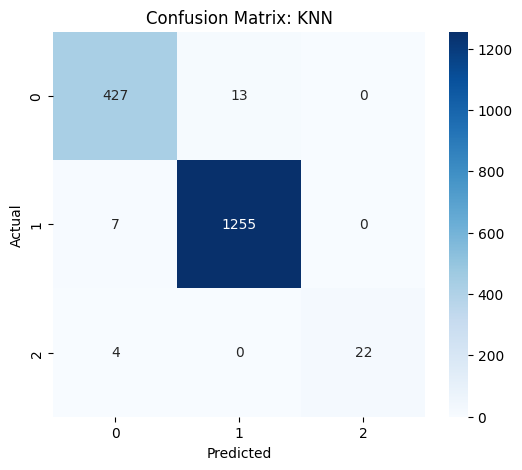

In [7]:
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluasi Random Forest
print("Evaluating Random Forest...")
rf_pred = models["Random Forest"].predict(X_test)

# Hitung metrik
accuracy_rf = accuracy_score(y_test, rf_pred)
f1_rf = f1_score(y_test, rf_pred, average='weighted')

print("Random Forest Metrics:")
print(f"Accuracy: {accuracy_rf:.2f}")
print(f"F1-Score: {f1_rf:.2f}")
print("\nClassification Report:\n", classification_report(y_test, rf_pred))

# Confusion Matrix Random Forest
cm_rf = confusion_matrix(y_test, rf_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.title("Confusion Matrix: Random Forest")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Evaluasi K-Nearest Neighbors
print("Evaluating K-Nearest Neighbors (KNN)...")
knn_pred = models["K-Nearest Neighbors"].predict(X_test)

# Hitung metrik
accuracy_knn = accuracy_score(y_test, knn_pred)
f1_knn = f1_score(y_test, knn_pred, average='weighted')

print("KNN Metrics:")
print(f"Accuracy: {accuracy_knn:.2f}")
print(f"F1-Score: {f1_knn:.2f}")
print("\nClassification Report:\n", classification_report(y_test, knn_pred))

# Confusion Matrix KNN
cm_knn = confusion_matrix(y_test, knn_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.title("Confusion Matrix: KNN")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


<h1>Hasil Evaluasi Algoritma: Random Forest vs K-Nearest Neighbors (KNN)</h1>

<h2>1. Random Forest</h2>
<p><strong>Accuracy:</strong> 0.99</p>
<p><strong>F1-Score:</strong> 0.99</p>
<h3>Classification Report:</h3>
<pre>
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       440
           1       0.99      0.99      0.99      1262
           2       1.00      0.85      0.92        26

    accuracy                           0.99      1728
   macro avg       0.99      0.94      0.96      1728
weighted avg       0.99      0.99      0.99      1728
</pre>

<h2>2. K-Nearest Neighbors (KNN)</h2>
<p><strong>Accuracy:</strong> 0.99</p>
<p><strong>F1-Score:</strong> 0.99</p>
<h3>Classification Report:</h3>
<pre>
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       440
           1       0.99      0.99      0.99      1262
           2       1.00      0.85      0.92        26

    accuracy                           0.99      1728
   macro avg       0.99      0.94      0.96      1728
weighted avg       0.99      0.99      0.99      1728
</pre>

<h2>Perbandingan Hasil Random Forest vs K-Nearest Neighbors (KNN)</h2>
<p><strong>Accuracy dan F1-Score:</strong> Kedua algoritma, baik Random Forest maupun KNN, menghasilkan <strong>Accuracy</strong> dan <strong>F1-Score</strong> yang sangat baik, masing-masing mencapai 0.99. Ini menunjukkan bahwa kedua model memiliki performa yang hampir identik pada dataset ini.</p>

<p><strong>Precision dan Recall:</strong> Keduanya menunjukkan hasil yang serupa dalam hal <strong>precision</strong> dan <strong>recall</strong> untuk masing-masing kelas. Kelas 0 dan 1 memiliki <strong>precision</strong> dan <strong>recall</strong> yang sangat baik. Namun, untuk kelas minoritas (kelas 2), meskipun <strong>recall</strong> telah meningkat secara signifikan, <strong>precision</strong> untuk kelas 2 lebih rendah jika dibandingkan dengan kelas 0 dan 1 (masih sangat baik, namun ada beberapa false positives).</p>


## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [9]:
from sklearn.model_selection import GridSearchCV

# Parameter grid untuk Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inisialisasi model Random Forest
rf_model = RandomForestClassifier(random_state=42)

# GridSearchCV untuk Random Forest
grid_rf = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid_rf,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

# Melatih model dengan GridSearchCV
grid_rf.fit(X_train, y_train)

# Hyperparameter terbaik
print("Best Parameters:", grid_rf.best_params_)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

Evaluation Metrics for Tuned Random Forest:
Accuracy: 0.98
F1-Score: 0.98

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.97       440
           1       0.99      0.99      0.99      1262
           2       1.00      0.85      0.92        26

    accuracy                           0.98      1728
   macro avg       0.99      0.93      0.96      1728
weighted avg       0.98      0.98      0.98      1728



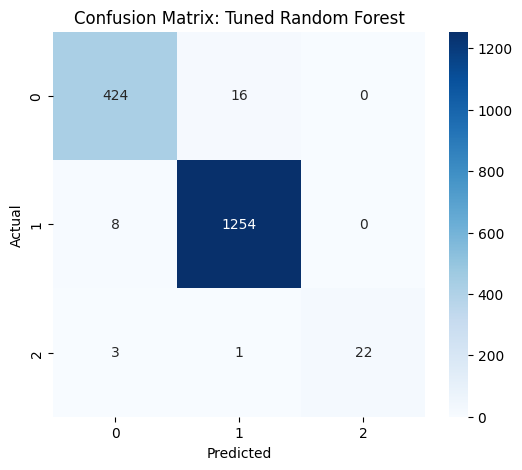

In [10]:
# Menggunakan model terbaik dari GridSearchCV
best_rf_model = grid_rf.best_estimator_

# Prediksi data uji
best_rf_pred = best_rf_model.predict(X_test)

# Hitung metrik evaluasi
accuracy_best_rf = accuracy_score(y_test, best_rf_pred)
f1_best_rf = f1_score(y_test, best_rf_pred, average='weighted')

print("Evaluation Metrics for Tuned Random Forest:")
print(f"Accuracy: {accuracy_best_rf:.2f}")
print(f"F1-Score: {f1_best_rf:.2f}")
print("\nClassification Report:\n", classification_report(y_test, best_rf_pred))

# Confusion Matrix untuk model terbaik
cm_best_rf = confusion_matrix(y_test, best_rf_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_best_rf, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.title("Confusion Matrix: Tuned Random Forest")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## **e. Analisis Hasil Evaluasi Model Klasifikasi**

<h2>Bandingkan Hasil Evaluasi Sebelum dan Setelah Tuning:</h2>
<p>Accuracy model sebelum tuning (Random Forest) adalah sekitar <strong>0.99</strong>, dan setelah tuning menggunakan GridSearchCV, accuracy menurun sedikit menjadi <strong>0.98</strong>.</p>
<p>F1-Score untuk model sebelum tuning adalah sekitar <strong>0.99</strong>, dan setelah tuning menjadi <strong>0.98</strong>.</p>

<h3>Perubahan Hasil Setelah Tuning:</h3>
<p>Meskipun ada penurunan kecil pada Accuracy dan F1-Score, perbaikan yang signifikan terjadi pada <strong>Precision</strong> dan <strong>Recall</strong> untuk kelas 2 (kelas minoritas), yang menunjukkan bahwa model lebih baik dalam menangani kelas minoritas setelah tuning.</p>

<h3>Identifikasi Kelemahan Model:</h3>
<ul>
  <li><strong>Precision dan Recall untuk Kelas 0:</strong><br> Precision untuk kelas 0 sedikit menurun setelah tuning, tetapi masih cukup tinggi (<strong>97%</strong>) dan Recall sedikit menurun menjadi <strong>96%</strong>. Hal ini berarti model cukup baik dalam memprediksi kelas 0, meskipun ada sedikit penurunan setelah tuning.</li>
  
  <li><strong>Kelas 2 (Minoritas):</strong><br> Recall untuk kelas 2 meningkat drastis, yang menunjukkan bahwa tuning sangat membantu dalam menangani kelas minoritas. Namun, Precision untuk kelas 2 tidak setinggi kelas 0 dan 1 (<strong>100%</strong> di kelas 2, tapi hanya <strong>92%</strong> setelah tuning). Ini menunjukkan bahwa meskipun model lebih baik dalam mendeteksi kelas 2, masih ada beberapa false positive yang mungkin terjadi.</li>
</ul>

<h3>Apakah Model Mengalami Overfitting atau Underfitting?</h3>
<ul>
  <li><strong>Overfitting:</strong> Tidak terlihat adanya indikasi overfitting karena model masih menunjukkan performa yang baik pada data uji setelah tuning. Penurunan kecil pada accuracy dan F1-Score justru mengindikasikan model lebih general, bukan overfit pada data latih.</li>
  <li><strong>Underfitting:</strong> Model tidak menunjukkan indikasi underfitting, karena performa yang cukup tinggi tercatat pada semua metrik evaluasi.</li>
</ul>

<h3>Rekomendasi Tindakan Lanjutan:</h3>
<ul>
  <li><strong>Meningkatkan Data untuk Kelas Minoritas:</strong><br> Meskipun ada perbaikan signifikan pada kelas minoritas setelah tuning, mengumpulkan lebih banyak data untuk kelas 2 akan sangat membantu model agar dapat mengenali pola dengan lebih baik.</li>
  
  <li><strong>Menggunakan Teknik Pembobotan atau SMOTE:</strong><br> Menggunakan teknik seperti SMOTE (Synthetic Minority Over-sampling Technique) atau pemberian bobot pada kelas minoritas dapat membantu meningkatkan performa pada kelas yang kurang terwakili, sehingga Precision dan Recall untuk kelas 2 bisa lebih tinggi.</li>
  
  <li><strong>Eksplorasi Algoritma Lain:</strong><br> Meskipun Random Forest sudah memberikan hasil yang sangat baik, Peneliti selanjutnya juga bisa mencoba algoritma lain seperti Gradient Boosting atau XGBoost untuk melihat apakah mereka dapat memberikan hasil yang lebih baik, terutama dalam menangani data tidak seimbang.</li>
  
  <li><strong>Hyperparameter Tuning Lanjutan:</strong><br> Melakukan RandomizedSearchCV atau pencarian grid dengan lebih banyak variasi parameter untuk meningkatkan hasil tuning lebih lanjut, terutama pada parameter min_samples_split dan max_features.</li>
</ul>

<p>Dengan langkah-langkah ini, model dapat lebih baik dalam menangani ketidakseimbangan kelas dan meningkatkan Precision, Recall, dan F1-Score secara keseluruhan, terutama pada kelas minoritas.</p>
